In [1]:
from strategies.stockbee.EP.scripts.data import process

from tqdm import tqdm
from strategies.pattern_search.dataprep import get_symbols
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

C:\Users\otrem\miniconda3\envs\trading\Lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [ ]:
start_ = '2022-01-01'
now = pd.Timestamp.now()
years = (now - pd.Timestamp(start_)).days / 365

symbols = get_symbols(min_data=years * 150)
symbols

In [3]:
pbar = tqdm(symbols.iterrows(), total=len(symbols))
windows = []
for i, row in pbar:
    symbol = row['symbol']
    exchange = row['primary_exchange']
    pbar.set_description(f'Processing {symbol}')
    
    try:
        gaps = process(symbol, exchange)
        if len(gaps) > 0:
            gaps['symbol'] = symbol
            gaps['exchange'] = exchange
            windows.append(gaps)
    except ValueError as e:
        print(e)
        #raise e
        pass

df = pd.concat(windows)
df = df.round(2)
df = df.drop(['exchange', 'capital gains'], axis=1)
df = df.replace('', np.nan)

df = df.replace([np.inf, -np.inf], 0)
for column in tqdm(df.columns):
    df[column] = pd.to_numeric(df[column], errors='ignore')

Processing A:   0%|          | 0/9121 [00:00<?, ?it/s]

Removing 17312 null values


C:\Users\otrem\PycharmProjects\trading\lib\y\__init__.py:24: DtypeWarning: Columns (43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(latest_file, index_col=0, parse_dates=True, keep_default_na=False)
Processing AUGX:   7%|▋         | 634/9121 [01:12<06:02, 23.41it/s]  

Length mismatch: Expected axis has 481 elements, new values have 480 elements


Processing CRK:  20%|█▉        | 1804/9121 [02:05<05:22, 22.66it/s]  

Length mismatch: Expected axis has 481 elements, new values have 480 elements


Processing LIBYU:  54%|█████▍    | 4917/9121 [04:29<02:59, 23.46it/s]

Length mismatch: Expected axis has 481 elements, new values have 480 elements


Processing MEAR:  57%|█████▋    | 5191/9121 [04:41<02:49, 23.23it/s] 

Length mismatch: Expected axis has 481 elements, new values have 480 elements


100%|██████████| 113/113 [00:00<00:00, 135.07it/s]


In [31]:
df[df['symbol'] == 'ELF']

,open,high,low,close,volume,dividends,splits,eps_estimate,reported_eps,surprise_pct,...,close_ma_20,volume_avg_10,highest_1,highest_1_index,lowest_1,drawdown_open_1,drawdown_low_1,maxrunup_open_1,maxrunup_close_1,win1
date,,,,,,,,,,,,,,,,,,,,,
2022-01-03 00:00:00+00:00,33.26,33.63,32.69,33.169998,556800,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,33.63,0.0,32.69,-1.71,0.00,1.11,1.39,-10.85
2022-01-04 00:00:00+00:00,33.12,33.53,32.49,32.509998,260700,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,33.53,0.0,32.49,-1.90,0.00,1.24,3.14,-12.27
2022-01-05 00:00:00+00:00,32.33,32.49,31.49,31.570000,287800,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,32.49,0.0,31.49,-2.60,0.00,0.49,2.91,-9.60
2022-01-06 00:00:00+00:00,31.34,31.70,31.19,31.469999,232000,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,31.89,1.0,31.06,-0.89,-0.42,1.75,1.33,-10.42
2022-01-07 00:00:00+00:00,31.39,31.89,31.06,31.070000,394500,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,31.89,0.0,31.06,-1.05,0.00,1.59,2.64,-8.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 00:00:00+00:00,112.11,116.37,112.01,113.760002,770700,0.0,0.0,0.53,0.82,56.06,...,103.20,1651150.0,121.26,3.0,112.01,-0.09,0.00,8.17,6.60,NaN
2023-11-24 00:00:00+00:00,114.09,115.39,113.06,114.379997,406100,0.0,0.0,0.53,0.82,56.06,...,103.77,1519140.0,121.26,2.0,113.06,-0.90,0.00,6.29,6.02,NaN
2023-11-27 00:00:00+00:00,115.31,121.01,115.00,117.440002,1542400,0.0,0.0,0.53,0.82,56.06,...,104.53,1410240.0,121.26,1.0,115.00,-0.27,0.00,5.16,3.26,NaN


# General Filtering

### Keep  data after 2023

In [32]:
print(f"Size before: {len(df)}")
df_ = df.loc[df.index > '2023-01-01'].copy()
print(f"Size after: {len(df_)}")

Size before: 4324986
Size after: 2087218


### Keep Data with Earnings (yesterday's night or today's morning)

In [33]:
print(f"Size before: {len(df_)}")
# TODO Check if reported earnings on evening happens the day after
df_ = df_.loc[df_['reported_eps'].notnull()].copy()
print(f"Size after: {len(df_)}")

Size before: 2087218
Size after: 782585


In [36]:
df_[df_['symbol'] == 'ELF']

,open,high,low,close,volume,dividends,splits,eps_estimate,reported_eps,surprise_pct,...,close_ma_20,volume_avg_10,highest_1,highest_1_index,lowest_1,drawdown_open_1,drawdown_low_1,maxrunup_open_1,maxrunup_close_1,win1
date,,,,,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00+00:00,56.17,56.96,54.90,55.340000,614400,0.0,0.0,0.16,0.36,123.71,...,54.88,446300.0,58.76,3.0,54.90,-2.26,0.00,4.61,6.18,21.59
2023-01-04 00:00:00+00:00,55.06,57.00,55.06,55.970001,565600,0.0,0.0,0.16,0.36,123.71,...,54.98,448540.0,69.30,20.0,48.10,-12.64,-12.64,25.86,23.81,24.60
2023-01-05 00:00:00+00:00,55.86,56.46,55.00,55.610001,815900,0.0,0.0,0.16,0.36,123.71,...,55.02,469300.0,71.62,20.0,48.10,-13.89,-12.55,28.21,28.79,23.48
2023-01-06 00:00:00+00:00,56.04,58.76,55.90,58.049999,1604400,0.0,0.0,0.16,0.36,123.71,...,55.20,597050.0,71.62,19.0,48.10,-14.17,-13.96,27.80,23.38,24.08
2023-01-09 00:00:00+00:00,57.95,58.49,55.60,55.759998,1949400,0.0,0.0,0.16,0.36,123.71,...,55.23,754540.0,72.20,20.0,48.10,-17.00,-13.49,24.59,29.48,28.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 00:00:00+00:00,112.11,116.37,112.01,113.760002,770700,0.0,0.0,0.53,0.82,56.06,...,103.20,1651150.0,121.26,3.0,112.01,-0.09,0.00,8.17,6.60,NaN
2023-11-24 00:00:00+00:00,114.09,115.39,113.06,114.379997,406100,0.0,0.0,0.53,0.82,56.06,...,103.77,1519140.0,121.26,2.0,113.06,-0.90,0.00,6.29,6.02,NaN
2023-11-27 00:00:00+00:00,115.31,121.01,115.00,117.440002,1542400,0.0,0.0,0.53,0.82,56.06,...,104.53,1410240.0,121.26,1.0,115.00,-0.27,0.00,5.16,3.26,NaN


In [34]:
#date_index = [d for (s, d) in df_filtered.index]
#df_filtered['date'] = date_index
# Set date as index
#df_filtered = df_filtered.set_index('date').copy()

### Keep data with gap

In [8]:
print(f"Size before: {len(df_)}")
df_ = df_.loc[df_['gap'].notnull()].copy()
print(f"Size after: {len(df_)}")

Size before: 782585
Size after: 369705


# MA: Massive Earnings Acceleration or Massive Earnings Surprise or Massive Sales (Revenue)

In [ ]:
print(f"Size before: {len(df_)}")
df_ = df_.loc[(df_['earnings_acceleration'] > 100) | (df_['surprise_pct'] > 100) | (df_['sales_acceleration'] > 100)].copy()
print(f"Size after: {len(df_)}")

# G: Gap > 4% and Volume > 100,000

Note: it doesn't check if the volume is post/pre market hours

In [ ]:
print(f"Size before: {len(df_)}")
df_ = df_.loc[(df_['gap'] > 4) & (df_['volume'] > 100000)].copy()
print(f"Size after: {len(df_)}")

# N: Neglect

In [ ]:
print(f"Size before: {len(df_)}")
df_ = df_.loc[df_['numberOfFunds'] <= 100].copy()
print(f"Size after: {len(df_)}")

In [ ]:
df_

# A: Acceleration of Sales

In [ ]:
print(f"Size before: {len(df_)}")
df_ = df_.loc[(df_['sales_acceleration'] > 100)].copy()
print(f"Size after: {len(df_)}")

In [ ]:
df_

# Data

In [29]:
df_4gpt = df_[(df_['gap'] > 10) & (df_['adr'] > 3.5) & (df_['volume'] > 1000000) & (df_['volume'] > df_['volume_avg_10'])] 
df_4gpt = df_4gpt.drop(['maxrunup_close_1', 'win1', 'highest_1_index', 'drawdown_low_1', 'lowest_1', 'high', 'low', 'close','highest_1'], axis=1)
df_4gpt.to_csv('4gpt.csv')

In [30]:
df_4gpt

,open,volume,dividends,splits,eps_estimate,reported_eps,surprise_pct,Amortization,AmortizationOfIntangiblesIncomeStatement,AverageDilutionEarnings,...,close_ma_10,ema_12,ema_26,MACD,signal,hist,close_ma_20,volume_avg_10,drawdown_open_1,maxrunup_open_1
date,,,,,,,,,,,,,,,,,,,,,
2023-02-02 00:00:00+00:00,336.50,4437200,0.0,0.0,1.56,1.73,10.90,NaN,NaN,NaN,...,270.92,273.78,250.60,23.18,15.56,7.62,252.42,1456790.0,-1.16,9.62
2023-07-27 00:00:00+00:00,403.83,3474500,0.0,0.0,2.03,2.22,9.36,NaN,NaN,NaN,...,350.31,349.25,342.69,6.56,6.80,-0.24,347.97,1296910.0,-6.02,2.32
2023-04-18 00:00:00+00:00,59.60,1896630,0.0,0.0,-0.42,-0.23,44.84,NaN,NaN,NaN,...,51.70,61.56,102.98,-41.43,-45.89,4.46,78.03,253332.5,-29.53,111.41
2023-07-17 00:00:00+00:00,477.50,2641900,0.0,0.0,-3.41,-4.26,-24.92,NaN,NaN,NaN,...,390.40,397.08,393.73,3.35,-2.66,6.00,391.33,516280.0,-0.65,15.34
2023-09-13 00:00:00+00:00,32.25,3650888,0.0,0.0,-0.06,-0.05,16.67,NaN,NaN,NaN,...,16.00,16.84,11.69,5.15,2.69,2.46,10.22,3083578.0,-21.71,27.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08 00:00:00+00:00,30.56,19266000,0.0,0.0,2.04,2.30,12.90,NaN,NaN,NaN,...,32.02,30.94,34.31,-3.38,-2.63,-0.75,33.66,18514190.0,-17.51,32.62
2023-02-22 00:00:00+00:00,189.42,2779500,0.0,0.0,0.41,0.60,47.82,NaN,NaN,NaN,...,167.33,167.97,161.96,6.02,4.99,1.03,163.80,992200.0,-6.77,2.28
2023-02-22 00:00:00+00:00,91.81,4466800,0.0,0.0,0.09,0.61,546.67,NaN,NaN,NaN,...,86.73,87.05,86.26,0.80,1.29,-0.49,87.94,973570.0,-5.55,6.74


<Axes: xlabel='maxrunup_open_1', ylabel='volume'>

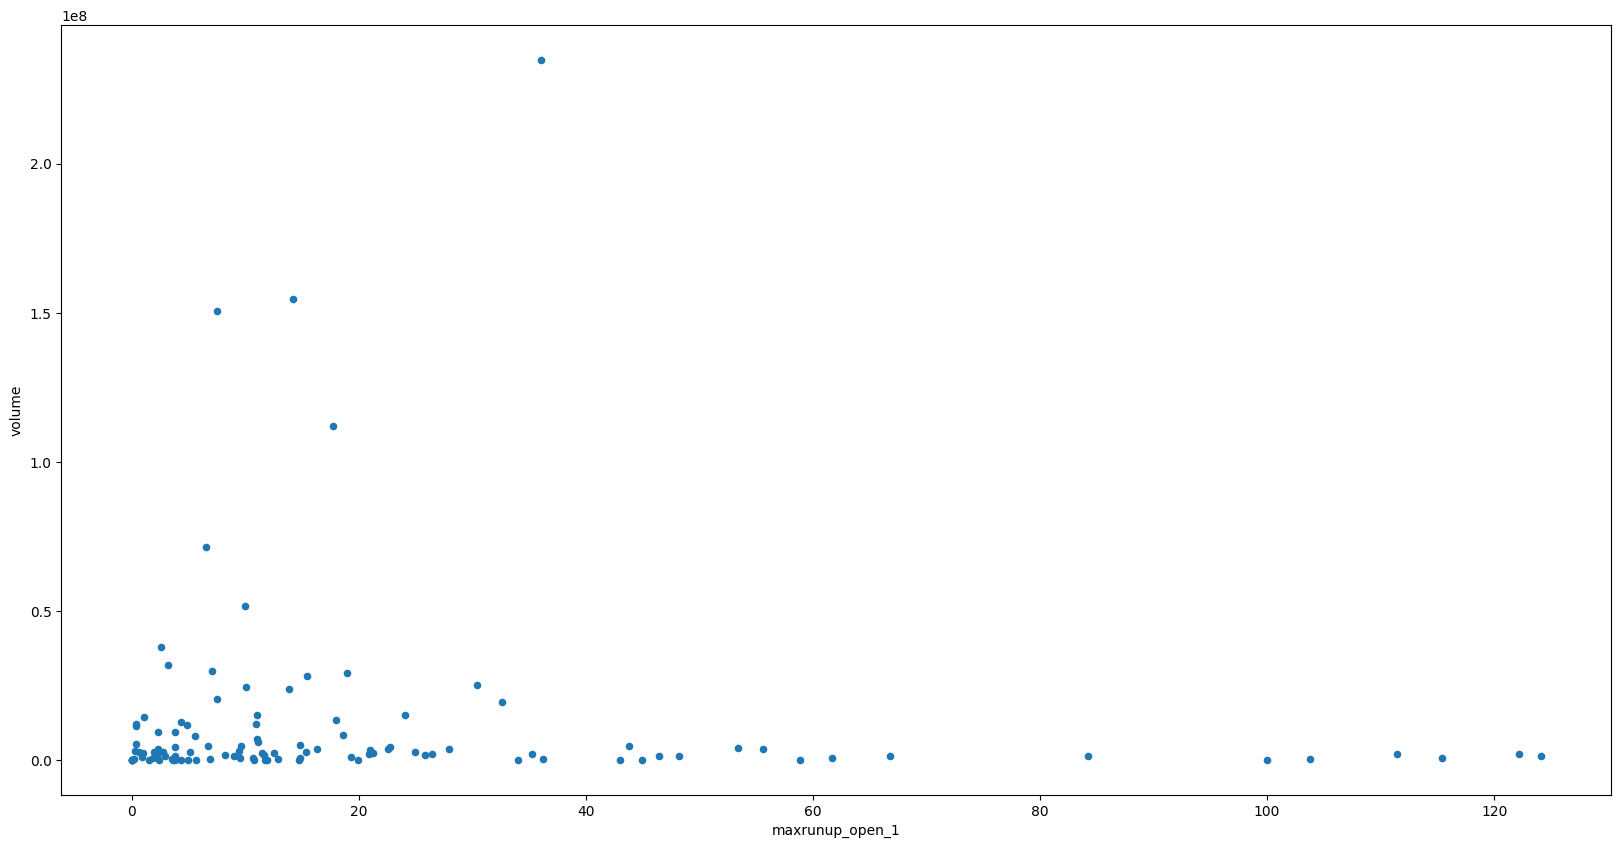

In [20]:
# Scatter plot maxrunup_open_1 and volume
# Increase figure
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
df_4gpt.plot.scatter(x='maxrunup_open_1', y='volume')

# Kullamaggie approach

In [ ]:
print(f"Size before: {len(df_)}")
df_ = df_.loc[(df_['gap'] > 10) & (df_['volume'] > 1000000)].copy()
print(f"Size after: {len(df_)}")

In [ ]:
df_test = df_[df_['drawdown_open_1'] >-5][['symbol', 'open', 'volume', 'maxrunup_open_1', 'drawdown_open_1', 'gap', 'surprise_pct', 'numberOfFunds', 'numberOfFunds_prev', 'marketCapitalizationPrimary']].sort_values(['maxrunup_open_1'], ascending=False)
print(f"Sum of Run Up: {df_test['maxrunup_open_1'].sum()}")
print(f"Sum of drawdown: {df_test['drawdown_open_1'].sum()}")

df_test

In [ ]:
df_big_winner = df_[(df_['maxrunup_open_1'] > 100) & (df_['volume'] > 1000000)]
df_big_winner[['symbol', 'open', 'volume', 'maxrunup_open_1', 'drawdown_open_1', 'gap', 'surprise_pct', 'numberOfFunds', 'numberOfFunds_prev', 'marketCapitalizationPrimary']]

In [ ]:
# Scatter plot maxrunup_open_1 and drawdown_open_1
# Increase figure
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
df_stats = df_[(df_['maxrunup_open_1'] > 10) & (df_['maxrunup_open_1'] < 200) & (df_['drawdown_low_1'] > -10)]
print(len(df_stats))
df_stats.plot.scatter(x='maxrunup_open_1', y='drawdown_low_1')

In [ ]:
len(df_)

In [ ]:
df_[df_['maxrunup_open_1'] == 199]

In [ ]:
stoplosses = range(0,100)
takeprofits = range(1, 200)
gaps = range(0, 100)
df_stats = df_.copy().reset_index()
#df_stats = df_stats[(df_stats['gap'] < 200) & (df_stats['maxrunup_open_1'] < 500)]

results = []
for gap in tqdm(gaps):
    df_stats = df_stats[df_stats['gap'] > gap]
    for stoploss in stoplosses:
        hit_stoploss = len(df_stats[(df_stats['drawdown_open_1'] <= -stoploss)]) * max(stoploss, 1)
        remaining_loss = df_stats[(df_stats['drawdown_open_1'] > -stoploss)]['drawdown_open_1'].sum()
        for takeprofit in takeprofits:
            hit_takeprofit = len(df_stats[(df_stats['maxrunup_open_1'] >= takeprofit) & (df_stats['drawdown_open_1'] >= -stoploss)]) * takeprofit
            remaining_profit = df_stats[(df_stats['maxrunup_open_1'] < takeprofit) & (df_stats['drawdown_open_1'] > -stoploss)]['maxrunup_open_1'].sum()
            ratio = hit_takeprofit/hit_stoploss if hit_stoploss > 0 else 0
            
            results.append({
                'takeprofit': takeprofit,
                'stoploss': stoploss,
                'hit_takeprofit': hit_takeprofit,
                'hit_stoploss': hit_stoploss,
                'ratio': ratio,
                'gap': gap,
                'remaining_loss': remaining_loss,
                'remaining_profit': remaining_profit
            })
df_results = pd.DataFrame(results)
df_results['profit'] = df_results['hit_takeprofit'] - df_results['hit_stoploss']
df_results['remaining'] = df_results['remaining_profit'] + df_results['remaining_loss']
df_results['total_profit'] = df_results['profit'] + df_results['remaining']
df_results.sort_values(by='ratio', ascending=False) 

In [ ]:
df_results[(df_results['gap'] >= 10) & (df_results['stoploss'] < 5)].sort_values(by='ratio', ascending=False)

In [ ]:
df_stats = df_.copy().reset_index()
df_gapped = df_stats[(df_stats['gap'] >= 10)]#[['date', 'symbol', 'open', 'high', 'low', 'close', 'gap', 'maxrunup_open_1', 'drawdown_open_1', 'lowest_1', 'highest_1_index']]

loser = df_gapped[(df_gapped['drawdown_open_1'] <= -1)][['date', 'symbol', 'open', 'high', 'low', 'close', 'gap', 'maxrunup_open_1', 'drawdown_open_1', 'lowest_1', 'highest_1_index']].sort_values(by='gap', ascending=False)
winner = df_gapped[(df_gapped['drawdown_open_1'] > -1)][['date', 'symbol', 'open', 'high', 'low', 'close', 'gap', 'maxrunup_open_1', 'drawdown_open_1', 'lowest_1', 'highest_1_index']].sort_values(by='gap', ascending=False)

In [ ]:
df_gapped

In [ ]:
winner.describe()

In [ ]:
loser.describe()

In [ ]:
df_gapped.to_csv('gapped.csv')

In [ ]:
df_stats = df_.copy().reset_index()
#df_stats = df_stats[df_stats['gap'] < 200]
df_stats['hit_takeprofit'] = (df_stats['maxrunup_open_1'] >= 144) & (df_stats['drawdown_open_1'] >= -1)
df_stats[df_stats['gap'] > 93][['date', 'symbol', 'open', 'high', 'low', 'close', 'gap', 'maxrunup_open_1', 'drawdown_open_1', 'lowest_1', 'highest_1_index', 'hit_takeprofit']].sort_values(by='gap', ascending=False)

In [ ]:
df_results[df_results['gap'] == 10].sort_values(by='ratio', ascending=False)

# GPT

In [ ]:
import numpy as np

# Define ranges for take profit and stop loss levels (in %)
take_profit_levels = np.arange(20, 100, 5)  # From 5% to 50% in increments of 5%
stop_loss_levels = np.arange(-1, -10, -1)  # From -5% to -50% in increments of 5%

# Create a dictionary to store results
results = {}
df_gpt = pd.read_csv('gapped.csv')
# Iterate through each combination of take profit and stop loss levels
for gap in tqdm(range(0, 100)):
    for tp in take_profit_levels:
        for sl in stop_loss_levels:
            # Initialize counters for trades
            successful_trades = 0
            total_trades = 0
            total_return = 0
            df_tmp = df_gpt[df_gpt['gap'] >= gap]
            # Simulate trades for each row in the dataset
            for index, row in df_tmp.iterrows():
                
                max_run_up = row['maxrunup_open_1']
                max_drawdown = row['drawdown_open_1']
    
                # Check if the take profit or stop loss would have been hit first
                if max_run_up >= tp:
                    # Take profit hit
                    total_return += tp
                    successful_trades += 1
                elif max_drawdown <= sl:
                    # Stop loss hit
                    total_return += sl
                
                total_trades += 1
    
            # Calculate success rate and average return per trade
            success_rate = successful_trades / total_trades if total_trades else 0
            average_return = total_return / total_trades if total_trades else 0
    
            # Store results
            results[(tp, sl, gap)] = {'success_rate': success_rate, 'average_return': average_return}

# Sort results by highest average return
sorted_results = sorted(results.items(), key=lambda x: x[1]['average_return'], reverse=True)

# Display the top 5 combinations
sorted_results[:5]


In [ ]:
# Convert sorted_results to an array
arr = [(k[0], k[1], k[2], v['success_rate'], v['average_return']) for k, v in sorted_results]
arr

In [ ]:
df_results_gpt = pd.DataFrame(arr, columns=['take_profit', 'stop_loss', 'gap', 'success_rate', 'average_return'])
df_results_gpt

# Correlation

In [ ]:
df_stats = df_.copy().reset_index()
df_stats = df_stats.drop(['symbol', 'date'], axis=1)

# remove outliers
df_stats = df_stats[(df_stats['gap'] < 100) & (df_stats['maxrunup_open_1'] < 500) & (df_stats['maxrunup_open_1'] >= 0)]
df_stats = (df_stats - df_stats.min()) / (df_stats.max() - df_stats.min())

In [ ]:
# Future knowledge
corr_drop_cols = ['maxrunup_open_1', 'maxrunup_close_1', 'win1', 'highest_1_index', 'drawdown_low_1', 'drawdown_open_1', 'lowest_1', 'high', 'low', 'close','highest_1']

In [ ]:
# Select numeric columns
df_stats[df_stats.select_dtypes(include='number').columns].corr()['maxrunup_open_1'].drop(corr_drop_cols)

In [ ]:
# Select numeric columns
df_stats[df_stats.select_dtypes(include='number').columns].corr(method='spearman')['maxrunup_open_1'].drop(corr_drop_cols)

In [ ]:
# Select numeric columns
df_stats[df_stats.select_dtypes(include='number').columns].corr(method='kendall')['maxrunup_open_1'].drop(corr_drop_cols)

# Regression

In [ ]:
look_ahead_columns = ['maxrunup_close_1', 'win1', 'highest_1_index', 'drawdown_low_1', 'drawdown_open_1', 'lowest_1', 'high', 'low', 'close','highest_1']
df_stats = df_stats.fillna(0).drop(look_ahead_columns, axis=1)
X = df_stats[df_stats.drop(['maxrunup_open_1'], axis=1).columns]
y = df_stats['maxrunup_open_1']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
# Predicting on the Test set
y_pred = model.predict(X_test)

# Calculating R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

# To get the coefficients and intercept:
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

In [ ]:
# Extracting coefficients
coefficients = model.coef_

# Matching coefficients with feature names
feature_names = X_train.columns
features_and_coeffs = zip(feature_names, coefficients)

# Sorting features by absolute value of coefficient
sorted_features = sorted(features_and_coeffs, key=lambda x: abs(x[1]), reverse=True)

df_coeffs = pd.DataFrame(sorted_features, columns=['feature', 'coefficient'])
df_coeffs

### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

df_stats = df_stats.fillna(0)
X = df_stats[df_stats.drop(['maxrunup_open_1'], axis=1).columns]
X = X[['gap', 'numberOfFunds', 'numberOfFunds_prev', 'volume', 'DepletionIncomeStatement', 'eps_estimate', 'open', 'reported_eps']]
y = df_stats['maxrunup_open_1']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
degree = 2  # or higher
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_test)

# Calculating R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

# To get the coefficients and intercept:
print(f"Coefficients: {polyreg['linearregression'].coef_}")
print(f"Intercept: {polyreg['linearregression'].intercept_}")


In [ ]:
df_stats.describe()

In [ ]:
# Show rows with inf values
numeric_df = df_stats.select_dtypes(include=[np.number])

# Check for positive and negative infinity in numeric columns
inf_rows = df_stats[np.isinf(numeric_df).any(axis=1)]
inf_rows


In [ ]:
threshold = 1e+18  # This is an example threshold, adjust based on your context

# Check for values larger than the threshold
large_value_rows = df_stats[(df_stats.abs() > threshold).any(axis=1)]

In [ ]:
# Combine both conditions
problematic_rows = df[np.isinf(df).any(axis=1) | (df.abs() > threshold).any(axis=1)]


# Remove rows without 6 months confirmation

In [ ]:
df_gap = df_gap.loc[df_gap['win1'].notnull()]
df_gap

# Multi months positive

In [ ]:
print(f"Size before: {len(df_volume)}")
df_multi_win = df_volume.loc[(df_volume['win1'] > 0) & (df_volume['win3'] > 0) & (df_volume['win6'] > 0)].copy()
print(f"Size after: {len(df_multi_win)}")

In [ ]:
# Filter earnings where win6 is over 70 and drawdown_low is over -5
df_multi_win.loc[(df_multi_win['win6'] > 70) & (df_multi_win['drawdown_low'] > -5)].sort_values(by='win6', ascending=False)[cols]

In [ ]:
# Plot drawdown_low and drawdown_open and bin them
df_volume['drawdown_open'].hist(bins=50)

In [ ]:
df_volume['drawdown_low'].hist(bins=100)

# 6 Month winners

In [ ]:
print(f"Size before: {len(df_earnings)}")
df_winners = df_earnings.loc[df_earnings['win6'] > 100].copy()
print(f"Size after: {len(df_winners)}")
df_winners[cols]

In [ ]:
# Set surprise_pct to float
df_winners['surprise_pct'] = df_winners['surprise_pct'].astype(float)
# Select rows where win1, win3, or win6 is over 1000
df_winners.loc[(df_winners['win1'] > 100) | (df_winners['win3'] > 100) | (df_winners['win6'] > 100)][cols].round(2)